In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import ROOT
from ROOT import TH1F, TCanvas

from sklearn.metrics import r2_score

Welcome to JupyROOT 6.28/09


In [2]:
with open("output.pkl", "rb") as f:
    output = pickle.load(f)

true_top_px_R = output["true_top_px_R"]
true_top_py_R = output["true_top_py_R"]
true_top_pz_R = output["true_top_pz_R"]

pred_top_px_R = output["pred_top_px_R"]
pred_top_py_R = output["pred_top_py_R"]
pred_top_pz_R = output["pred_top_pz_R"]

true_down_px_R = output["true_down_px_R"]
true_down_py_R = output["true_down_py_R"]
true_down_pz_R = output["true_down_pz_R"]

pred_down_px_R = output["pred_down_px_R"]
pred_down_py_R = output["pred_down_py_R"]
pred_down_pz_R = output["pred_down_pz_R"]

true_top_px_L = output["true_top_px_L"]
true_top_py_L = output["true_top_py_L"]
true_top_pz_L = output["true_top_pz_L"]

pred_top_px_L = output["pred_top_px_L"]
pred_top_py_L = output["pred_top_py_L"]
pred_top_pz_L = output["pred_top_pz_L"]

true_down_px_L = output["true_down_px_L"]
true_down_py_L = output["true_down_py_L"]
true_down_pz_L = output["true_down_pz_L"]

pred_down_px_L = output["pred_down_px_L"]
pred_down_py_L = output["pred_down_py_L"]
pred_down_pz_L = output["pred_down_pz_L"]

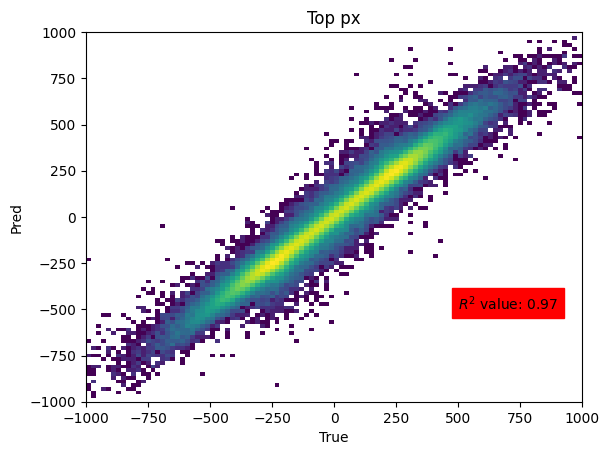

In [3]:
plt.title("Top px")
plt.hist2d(true_top_px_R, pred_top_px_R, bins=100,norm=mcolors.LogNorm(), range=((-1000,1000),(-1000,1000)))
plt.xlabel("True")
plt.ylabel("Pred")
plt.text(500,-500,"$R^2$ value: "+str(round(r2_score(true_top_px_R,pred_top_px_R),3)),backgroundcolor='r',color='k')
plt.show()

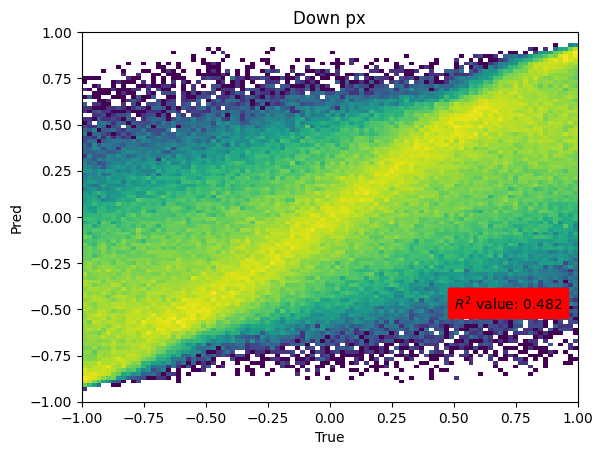

In [4]:
plt.title("Down px")
plt.hist2d(true_down_px_R, pred_down_px_R, bins=100,norm=mcolors.LogNorm(), range=((-1,1),(-1,1)))
plt.xlabel("True")
plt.ylabel("Pred")
plt.text(0.5,-0.5,"$R^2$ value: "+str(round(r2_score(true_down_px_R,pred_down_px_R),3)),backgroundcolor='r',color='k')
plt.show()

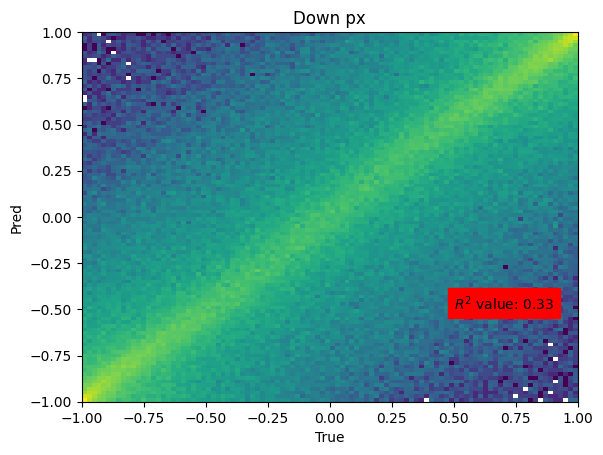

In [5]:
norm = np.sqrt(pred_down_px_L**2+pred_down_py_L**2+pred_down_pz_L**2)
pred_down_px_L_norm = pred_down_px_L/norm
pred_down_py_L_norm = pred_down_py_L/norm
pred_down_pz_L_norm = pred_down_pz_L/norm
norm = np.sqrt(pred_down_px_R**2+pred_down_py_R**2+pred_down_pz_R**2)
pred_down_px_R_norm = pred_down_px_R/norm
pred_down_py_R_norm = pred_down_py_R/norm
pred_down_pz_R_norm = pred_down_pz_R/norm

norm = np.sqrt(true_top_px_L**2+true_top_py_L**2+true_top_pz_L**2)
true_top_px_L_norm = true_top_px_L/norm
true_top_py_L_norm = true_top_py_L/norm
true_top_pz_L_norm = true_top_pz_L/norm
norm = np.sqrt(true_top_px_R**2+true_top_py_R**2+true_top_pz_R**2)
true_top_px_R_norm = true_top_px_R/norm
true_top_py_R_norm = true_top_py_R/norm
true_top_pz_R_norm = true_top_pz_R/norm

norm = np.sqrt(pred_top_px_L**2+pred_top_py_L**2+pred_top_pz_L**2)
pred_top_px_L_norm = pred_top_px_L/norm
pred_top_py_L_norm = pred_top_py_L/norm
pred_top_pz_L_norm = pred_top_pz_L/norm
norm = np.sqrt(pred_top_px_R**2+pred_top_py_R**2+pred_top_pz_R**2)
pred_top_px_R_norm = pred_top_px_R/norm
pred_top_py_R_norm = pred_top_py_R/norm
pred_top_pz_R_norm = pred_top_pz_R/norm

plt.title("Down px")
plt.hist2d(true_down_px_R, pred_down_px_R_norm, bins=100,norm=mcolors.LogNorm(), range=((-1,1),(-1,1)))
plt.xlabel("True")
plt.ylabel("Pred")
plt.text(0.5,-0.5,"$R^2$ value: "+str(round(r2_score(true_down_px_R,pred_down_px_R_norm),3)),backgroundcolor='r',color='k')
plt.show()

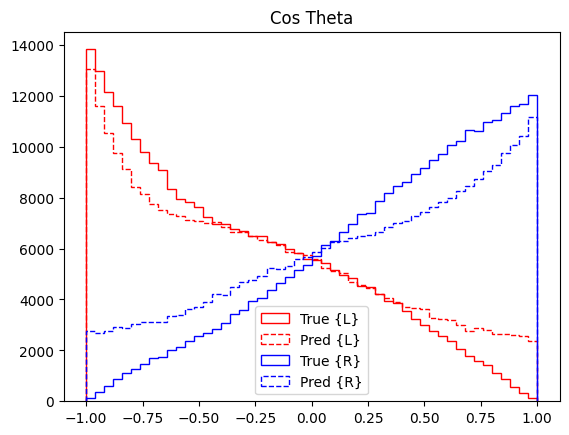

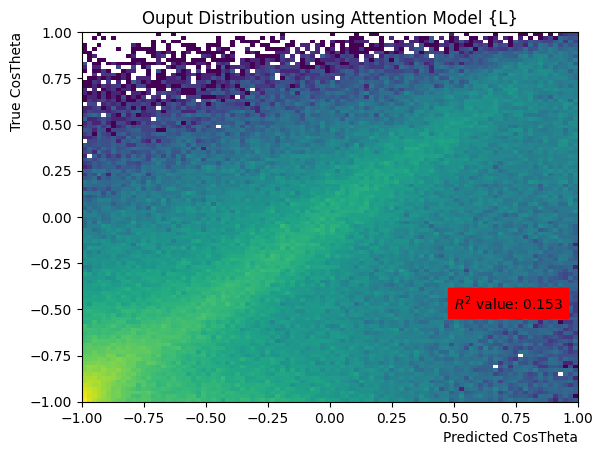

In [6]:
cos_theta_true_L = true_top_px_L_norm*true_down_px_L+true_top_py_L_norm*true_down_py_L+true_top_pz_L_norm*true_down_pz_L
cos_theta_pred_L = pred_top_px_L_norm*pred_down_px_L_norm+pred_top_py_L_norm*pred_down_py_L_norm+pred_top_pz_L_norm*pred_down_pz_L_norm
cos_theta_true_R = true_top_px_R_norm*true_down_px_R+true_top_py_R_norm*true_down_py_R+true_top_pz_R_norm*true_down_pz_R
cos_theta_pred_R = pred_top_px_R_norm*pred_down_px_R_norm+pred_top_py_R_norm*pred_down_py_R_norm+pred_top_pz_R_norm*pred_down_pz_R_norm

plt.title("Cos Theta")
plt.hist(cos_theta_true_L,histtype='step',bins=50,range=(-1,1),color='r',label='True {L}',linestyle="-")
plt.hist(cos_theta_pred_L,histtype='step',bins=50,range=(-1,1),color='r',label='Pred {L}',linestyle="--")
plt.hist(cos_theta_true_R,histtype='step',bins=50,range=(-1,1),color='b',label='True {R}',linestyle="-")
plt.hist(cos_theta_pred_R,histtype='step',bins=50,range=(-1,1),color='b',label='Pred {R}',linestyle="--")
plt.legend()
plt.show()

plt.figure()
plt.title("Ouput Distribution using Attention Model {L}")
plt.hist2d(cos_theta_pred_L,cos_theta_true_L,bins=100,norm=mcolors.LogNorm(),range=((-1,1),(-1,1)))
plt.xlabel('Predicted CosTheta',loc='right')
plt.ylabel('True CosTheta',loc='top')
plt.text(0.5,-0.5,"$R^2$ value: "+str(round(r2_score(cos_theta_pred_L,cos_theta_true_L),3)),backgroundcolor='r',color='k')
plt.show()
plt.close()

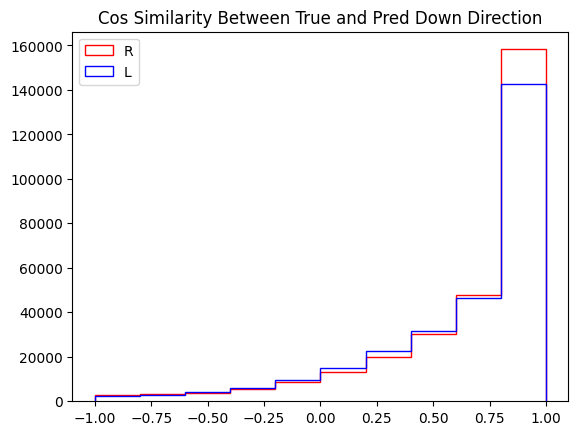

In [7]:
cos_similarity_L = true_down_px_L*pred_down_px_L_norm+true_down_py_L*pred_down_py_L_norm+true_down_pz_L*pred_down_pz_L_norm
cos_similarity_R = true_down_px_R*pred_down_px_R_norm+true_down_py_R*pred_down_py_R_norm+true_down_pz_R*pred_down_pz_R_norm

plt.title("Cos Similarity Between True and Pred Down Direction")
plt.hist(cos_similarity_R,histtype='step',color='r',label='R')
plt.hist(cos_similarity_L,histtype='step',color='b',label='L')
plt.legend()
plt.show()

In [8]:
def fit_beta(angles, polarization):
    # Convert list to numpy array
    angles = np.array(angles)
    
    # Define polarization
    if "L" in polarization:
        p=-1
    if "R" in polarization:
        p=1    
    
    # Book Histogram
    hist_angles = TH1F( "title", "title", 100, -1, 1 )

    # Book Canvas
    c = ROOT.TCanvas("c", "Histogram Canvas", 800, 600)
    
    # Fill Histogram
    for angle in angles:
        hist_angles.Fill(angle)
        
    hist_angles.Scale(1/hist_angles.Integral("width"))
        
    # Draw Histogram
    hist_angles.Draw()
    #c.SaveAs(title+".png")
    #c.Draw()
        
    # Define Custom Fit Function
    def beta_function(costheta, parameters):
        return 1/2*(1+parameters[0]*costheta[0])
    
    # Initialize Fit Function
    fit = ROOT.TF1("fit", beta_function, -1, 1, 1)
    fit.SetParameters(0)
    fit.SetParNames("p*Beta")
    
    # Perform Fit
    #hist_angles.Fit(fit)
    hist_angles.Fit(fit, "e")
    #hist_angles.Fit(fit, "q")
    
    # Print Results
    fitted_beta = fit.GetParameters()[0]*p
    method_2 = np.mean(angles)*3*p
    positive_angles = len(angles[angles>0])
    negative_angles = len(angles[angles<0])
    method_3 = (positive_angles-negative_angles)/(positive_angles+negative_angles)*2*p
        
    #print(fitted_beta)
    return fitted_beta

In [9]:
print("True {L}: ", fit_beta(cos_theta_true_L, "L"))
print("Pred {L}: ", fit_beta(cos_theta_pred_L, "L"))
print("True {R}: ", fit_beta(cos_theta_true_R, "R"))
print("Pred {R}: ", fit_beta(cos_theta_pred_R, "R"))

True {L}:  0.9931851364105451
Pred {L}:  0.6743660205130425
True {R}:  1.011147176218191
Pred {R}:  0.6405843445159654
 FCN=2545.33 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          22 TOTAL
                     EDM=8.1837e-18    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p*Beta      -9.93185e-01   1.26431e-03   1.26431e-03  -3.19990e-06
 FCN=2764.04 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          22 TOTAL
                     EDM=2.45069e-18    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p*Beta      -6.74366e-01   2.82686e-03   2.82686e-03  -7.83169e-07
 FCN=1259.91 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          22 TOTAL
                     EDM=8.13532e-18    STRATEGY= 1      

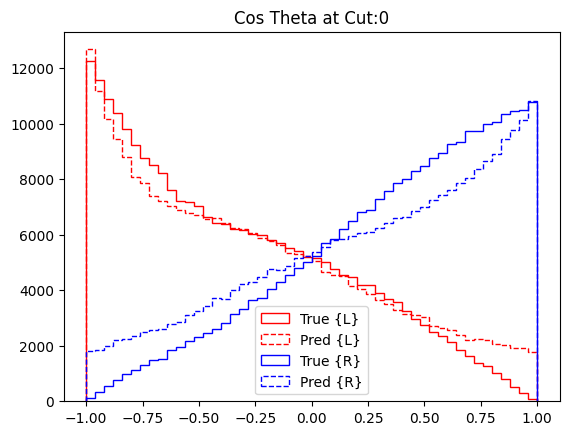

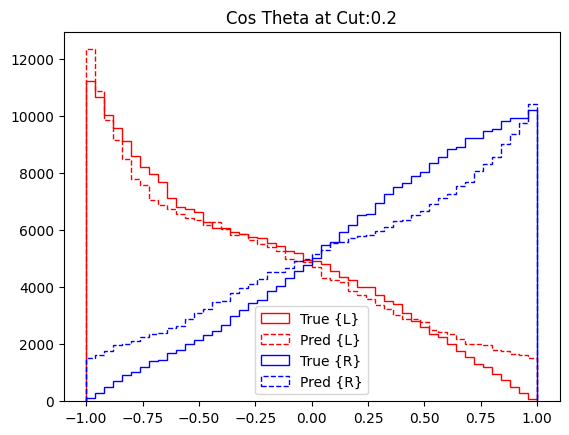

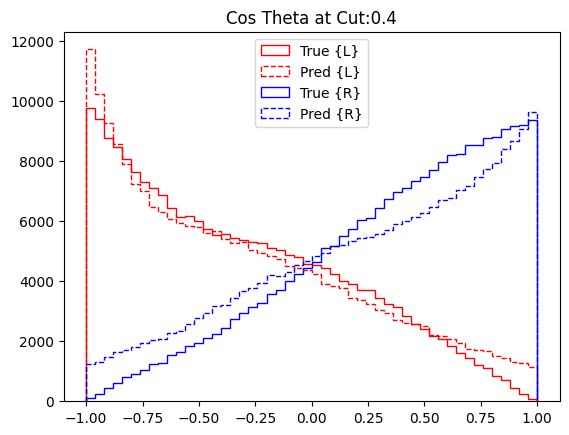

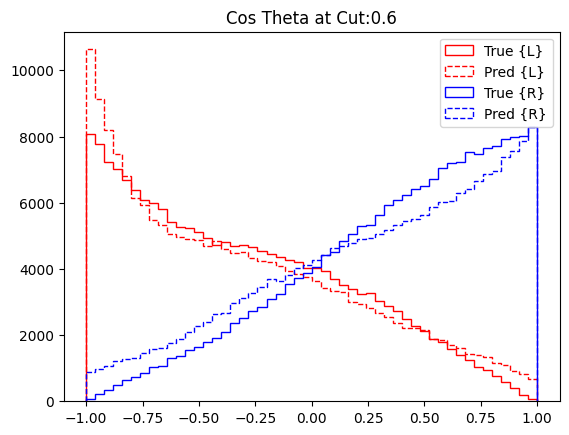

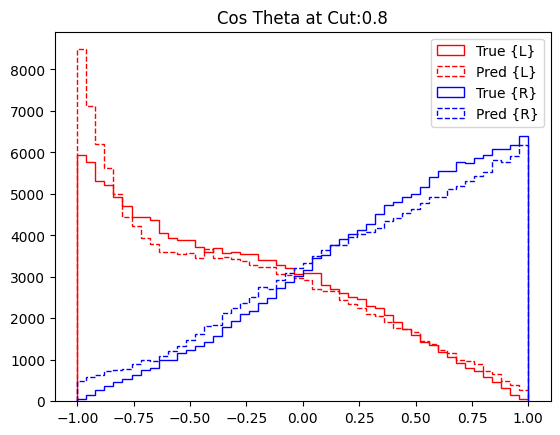

 FCN=2925.9 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          22 TOTAL
                     EDM=8.33462e-19    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p*Beta      -7.64535e-01   2.79710e-03   2.79710e-03  -4.61582e-07
 FCN=853.186 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          22 TOTAL
                     EDM=4.95813e-21    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p*Beta       7.32352e-01   2.75509e-03   2.75509e-03  -3.61442e-08
 FCN=3098.05 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          22 TOTAL
                     EDM=2.9934e-17    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE  

In [10]:
cuts = [0,0.2,0.4,0.6,0.8]
beta_L = []
beta_R = []

for cut in cuts:
    mask_L = cos_similarity_L>cut
    mask_R = cos_similarity_R>cut
    cos_theta_true_L_cut = true_top_px_L_norm[mask_L]*true_down_px_L[mask_L]+true_top_py_L_norm[mask_L]*true_down_py_L[mask_L]+true_top_pz_L_norm[mask_L]*true_down_pz_L[mask_L]
    cos_theta_pred_L_cut = pred_top_px_L_norm[mask_L]*pred_down_px_L_norm[mask_L]+pred_top_py_L_norm[mask_L]*pred_down_py_L_norm[mask_L]+pred_top_pz_L_norm[mask_L]*pred_down_pz_L_norm[mask_L]
    cos_theta_true_R_cut = true_top_px_R_norm[mask_R]*true_down_px_R[mask_R]+true_top_py_R_norm[mask_R]*true_down_py_R[mask_R]+true_top_pz_R_norm[mask_R]*true_down_pz_R[mask_R]
    cos_theta_pred_R_cut = pred_top_px_R_norm[mask_R]*pred_down_px_R_norm[mask_R]+pred_top_py_R_norm[mask_R]*pred_down_py_R_norm[mask_R]+pred_top_pz_R_norm[mask_R]*pred_down_pz_R_norm[mask_R]
    
    plt.title("Cos Theta at Cut:"+str(cut))
    plt.hist(cos_theta_true_L_cut,histtype='step',bins=50,range=(-1,1),color='r',label='True {L}',linestyle="-")
    plt.hist(cos_theta_pred_L_cut,histtype='step',bins=50,range=(-1,1),color='r',label='Pred {L}',linestyle="--")
    plt.hist(cos_theta_true_R_cut,histtype='step',bins=50,range=(-1,1),color='b',label='True {R}',linestyle="-")
    plt.hist(cos_theta_pred_R_cut,histtype='step',bins=50,range=(-1,1),color='b',label='Pred {R}',linestyle="--")
    plt.legend()
    plt.show()
    
    beta_L.append(fit_beta(cos_theta_pred_L_cut, "L"))
    beta_R.append(fit_beta(cos_theta_pred_R_cut, "R")) 

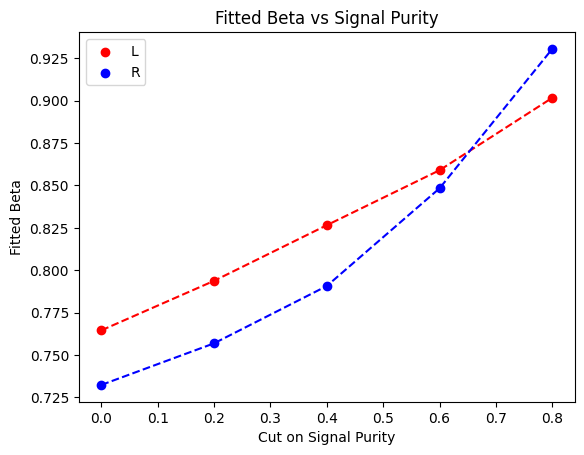

In [11]:
plt.title("Fitted Beta vs Signal Purity")
plt.scatter(cuts, beta_L, color='r', label='L')
plt.plot(cuts, beta_L, linestyle='--', color='r')

plt.scatter(cuts, beta_R, color='b', label='R')
plt.plot(cuts, beta_R, linestyle='--', color='b')

plt.legend()
plt.ylabel("Fitted Beta")
plt.xlabel("Cut on Signal Purity")
plt.show()